# Analyzing the Propagation of Extreme Events

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.integrate as sci
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def network_ode(z, t, N, A, s, k=0.01, ϵ1=1000, ϵ2=0.05, c=1.5, a=0.35):
    
    zz = list(np.zeros(2*N))
    
    for i in range(N):
        
        KK = sum(A[i,j]*k*(z[2*j]-z[2*i]) for j in range(N))/2
        
        if i==0:
            KK += s
        
        zz[2*i] = (z[2*i] - (z[2*i]**3)/3 - c*z[2*i+1] - a + KK)/(ϵ1*ϵ2)
        zz[2*i+1] = (z[2*i] - c*z[2*i+1])/(ϵ1)
    
    return zz

In [3]:
def create_adjacency_adjacency(N):
    A = np.zeros((N,N))
    for i in range(N):
        A[i,(i-1)%N] = 1
        A[i,(i+1)%N] = 1
    return A

In [4]:
def ode_solver(func, tf, dt, z_init, signal, N, A, K):
    
    times = np.arange(0, tf, dt)
    data = np.zeros((int(tf/dt), len(z_init)))
    
    z = z_init
    
    index = 0
    
    for time in tqdm(times):
        sol = sci.odeint(func, z, [time, time+dt], args=(N, A, signal[index], K))
        z = list(sol[-1])
        data[index] = z
        index+=1
    
    return data

In [5]:
def nulcline(x, z, k=0.09, ϵ1=1000, ϵ2=0.05, c=1.5, a=0.35):
    return [
        (x -  (x**3)/3 - a + k*(z-x))/(c),
        x/c
    ]

In [6]:
def find_maximas(dd, threshold=-float('inf'), para=0, osc=0):
    mx = np.array([np.array([para, osc, i, dd[i]]) for i in range(1,len(dd)-1) if dd[i]>max(dd[i-1],dd[i+1])])
    try:
        mx = mx[mx[:,3]>threshold]
    except:
        pass
    return mx

In [42]:
seed = 1235
# seed = 1234
np.random.seed(seed)

tf = 200000
dt = 1
N = 2
pert_freq = 650
cc = 0.025

ss = np.zeros(int(tf/dt))

for i in range(int(tf/dt)):
    if i>10000 and i%pert_freq==0:
        ss[i] = 10

adj = create_adjacency_adjacency(N)

z0 = np.random.random(2*N)

d = ode_solver(network_ode, tf, dt, z0, ss, N, adj, cc)

100%|██████████| 200000/200000 [02:14<00:00, 1487.58it/s]


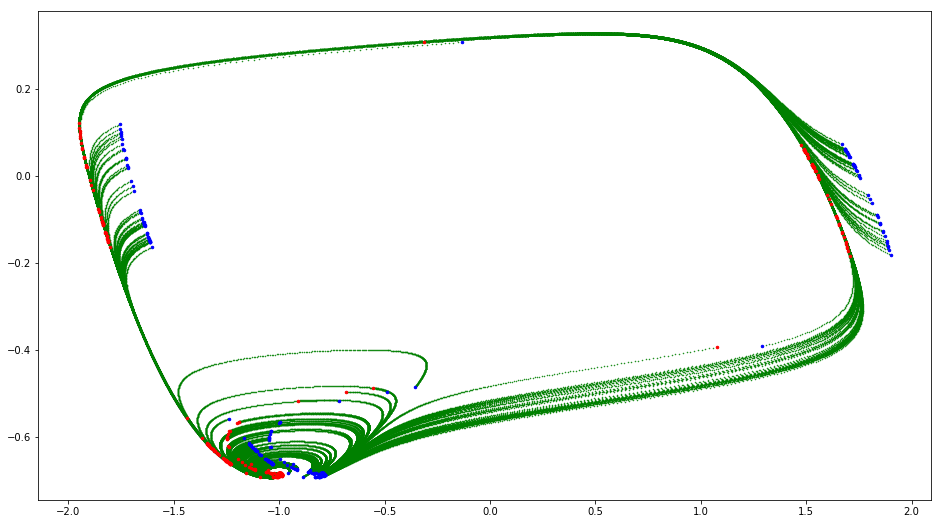

In [43]:
%matplotlib inline

tr = 40000

plt.figure(figsize=(16,9))

d0 = d[tr:,:]
d1 = np.array([d[i,:] for i in range(tr,len(d)) if (i+1)%pert_freq == 0])
d2 = np.array([d[i,:] for i in range(tr,len(d)) if i%pert_freq == 0])

plt.plot(d0[:,0],d0[:,1],'.g', ms=1)
plt.plot(d1[:,0],d1[:,1],'.r', ms=5)
plt.plot(d2[:,0],d2[:,1],'.b', ms=5)


plt.show()

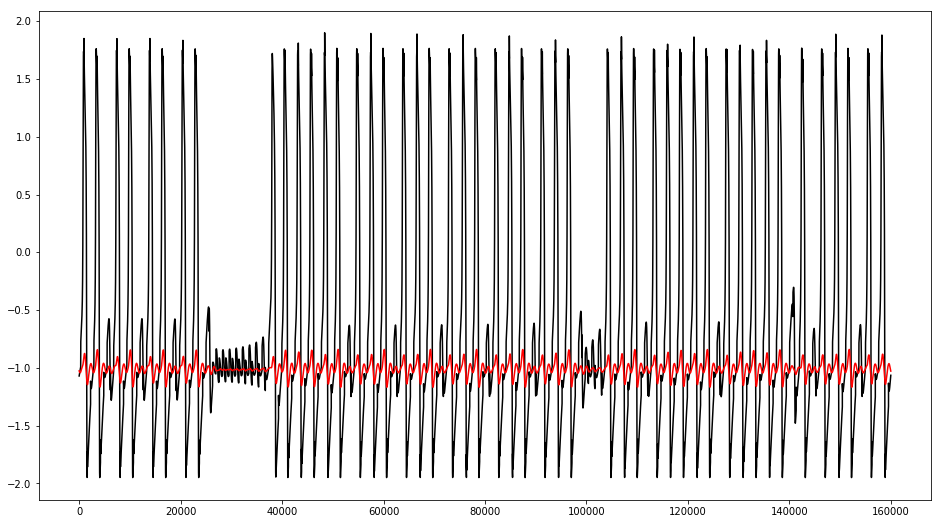

In [44]:
tr = 40000

plt.figure(figsize=(16,9))

d0 = d[tr:,:]

plt.plot(d0[:,0], 'k')
plt.plot(d0[:,2], 'r')

plt.show()

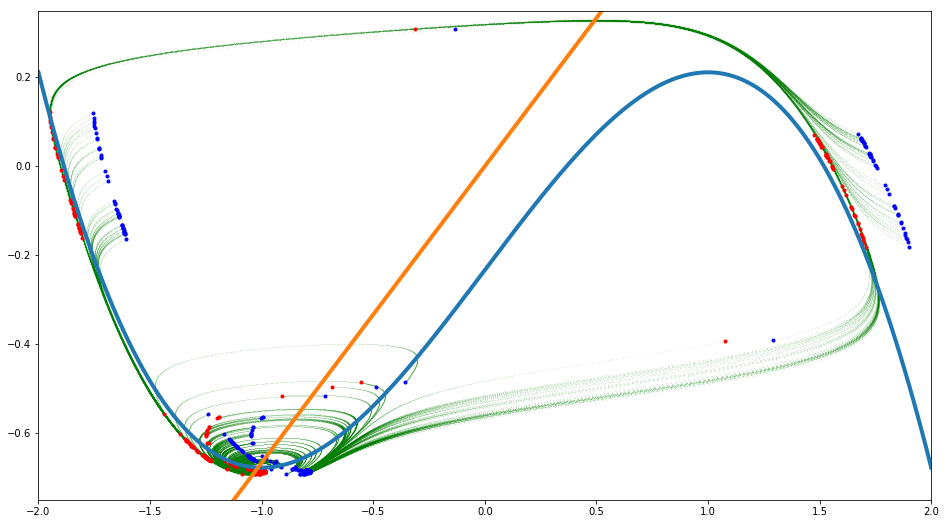

In [45]:
%matplotlib inline

plt.figure(figsize=(16,9))

x1 = np.linspace(-2,2,200)
# x2 = np.linspace(-2,2,200)

# XX1, XX2 = np.meshgrid(x1,x2)


nlx, nly = nulcline(x1,x1)

plt.plot(d0[:,0],d0[:,1],'.g', ms=0.1)
plt.plot(d1[:,0], d1[:,1], '.r')
plt.plot(d2[:,0], d2[:,1], '.b')

plt.plot(x1,nlx, lw=4)
plt.plot(x1,nly, lw=4)

plt.xlim((-2,2))
plt.ylim((-0.75,0.35))
plt.show()

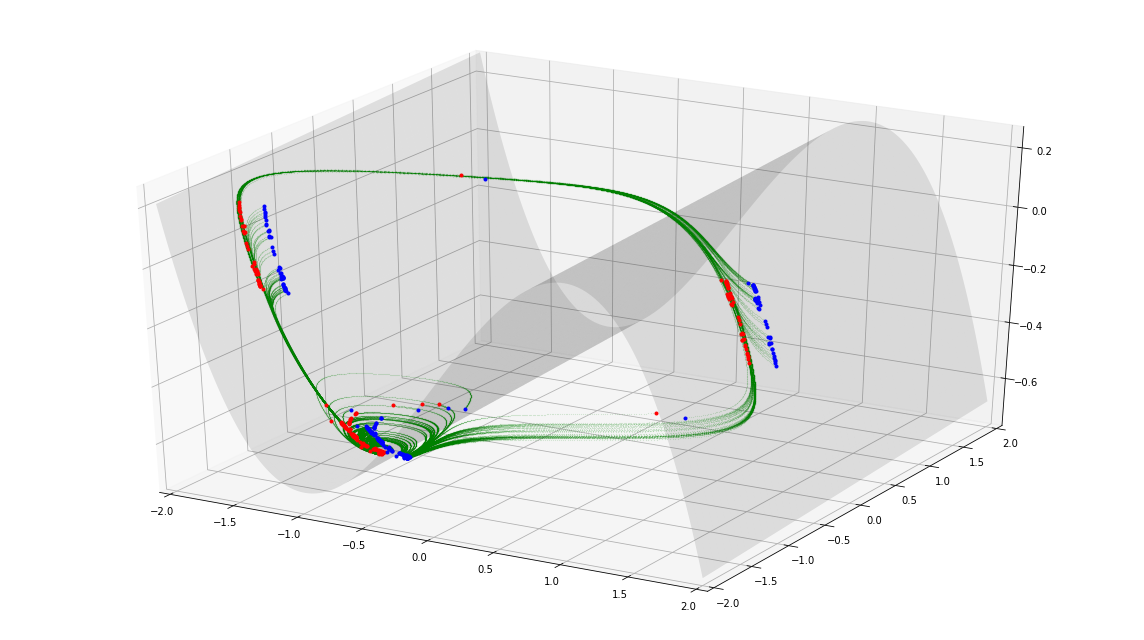

In [46]:
%matplotlib inline

# fig= plt.figure(figsize=(9,9))
fig= plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')

x1 = np.linspace(-2,2,200)
x2 = np.linspace(-2,2,200)

XX1, XX2 = np.meshgrid(x1,x2)

nlx, nly = nulcline(XX1,XX2, k=cc)

ax.plot(d0[:,0], d0[:,2], d0[:,1], '.g', ms=0.1)
ax.plot(d1[:,0], d1[:,2], d1[:,1], '.r')
ax.plot(d2[:,0], d2[:,2], d2[:,1], '.b')

ax.plot_surface(XX1, XX2, nlx, color='k', alpha=0.1)
# ax.plot_surface(XX1, XX2, nly, color='c', alpha=1.0)

ax.set_xlim((-2,2))
ax.set_ylim((-2,2))
ax.set_zlim((-0.75,0.25))

#ax.set_xlim((-1.5,-0.5))
#ax.set_ylim((-1.5,-0.5))
#ax.set_zlim((-0.75,-.04))

plt.tight_layout()
plt.show()